In [1]:
%load_ext autoreload
%autoreload 2
from pipeline.solver import KlausmeierSolver

import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import sparse
from scipy.sparse.linalg import spsolve


## Labirynt

Przy poniższych parametrach uzyskujemy pattern na kształt **labiryntu**.

In [2]:

s = KlausmeierSolver(100,100,100,100, 0.1)
Nx, Ny = 100, 100
a = 2.0
m = 0.45
u = 2.0*np.ones(Nx * Ny)
v = 2.0*np.ones(Nx*Ny) + 0.05 * np.random.randn(Nx * Ny)

A_u, A_v = s.evolution_matrix(182.5,0.25)

iter_count = 0
while iter_count < 5000:
    iter_count += 1
    u_next, v_next = s.solve_step(u, v, a, m, A_u, A_v)
    u, v = u_next, v_next

    # Podgląd postępu
    if iter_count % 500 == 0:
        print(f"Krok {iter_count}: sprawdzanie formowania wzorców...")



Krok 5000: sprawdzanie formowania wzorców...


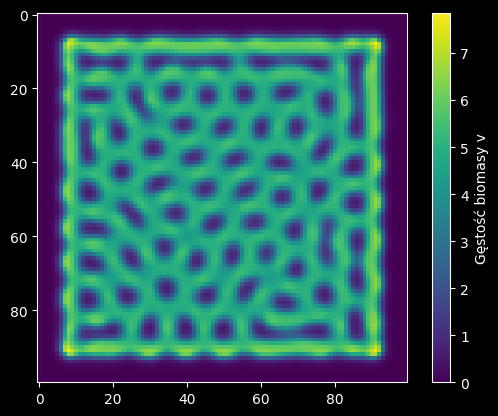

In [3]:
plt.imshow(v.reshape((Nx,Ny)))
plt.colorbar(label="Gęstość biomasy v")
plt.show()

Przy poniższych parametrach uzyskujemy pattern na kształt **labiryntu**, brak zaburzenia jednak pozostawia go w symetrii.

In [8]:

s = KlausmeierSolver(100, 100, 100, 100, 0.1)
Nx, Ny = 100, 100
a = 2.0
m = 0.45
u = 2.0 * np.ones(Nx * Ny)
v = 2.0 * np.ones(Nx * Ny)

A_u, A_v = s.evolution_matrix(182.5, 0.25)

iter_count = 0
while iter_count < 5000:
    iter_count += 1
    u_next, v_next = s.solve_step(u, v, a, m, A_u, A_v)
    u, v = u_next, v_next

    # Podgląd postępu
    if iter_count % 500 == 0:
        print(f"Krok {iter_count}: sprawdzanie formowania wzorców...")



Krok 5000: sprawdzanie formowania wzorców...


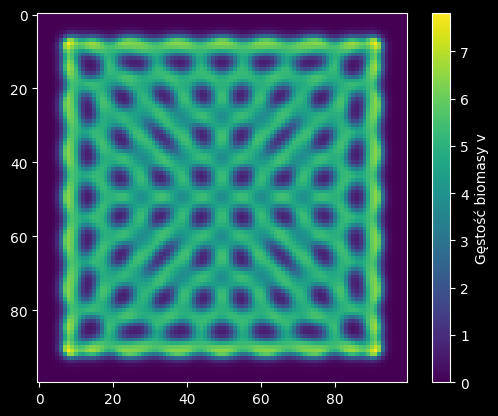

In [9]:
plt.imshow(v.reshape((Nx,Ny)))
plt.colorbar(label="Gęstość biomasy v")
plt.show()